# Initial EDA of Titanic Data
## Jesse Tootell
### MSDS 422 Sec55 Spring 2019

In [45]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [46]:
%matplotlib notebook

In [40]:
# import "train" data set from 
tdf = pd.read_csv('train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [42]:
# look at colnames
tdf.set_index('PassengerId', drop = True, inplace = True)
tdf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
# survived to death ratio
tdf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [60]:
tdf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


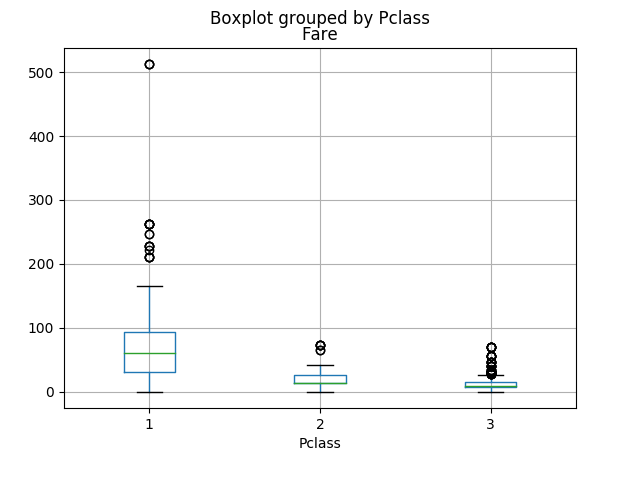

In [63]:
# curious to see if fare is as correlated to class as I would expect
tdf.boxplot(column='Fare', by='Pclass')

<IPython.core.display.Javascript object>


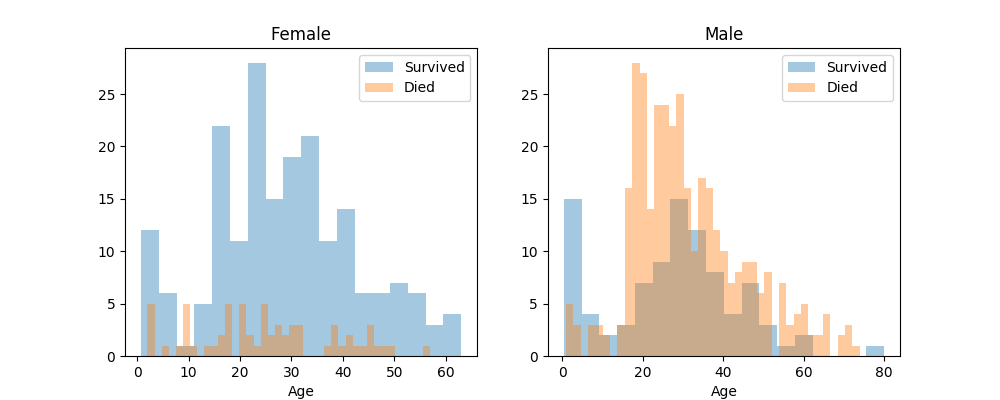

In [65]:
# The survival rate as a function of Age and Sex
survived = 'Survived'
died = 'Died'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = tdf[tdf['Sex']=='female']
men = tdf[tdf['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = died, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = died, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

# Embarked Socio-Economic Status, and Sex
Port of Origin as a potential indicator of survival. Shown as the proportion that survived by each point of origin (embarked), sex, anmd class
This is a super cool function!

<IPython.core.display.Javascript object>


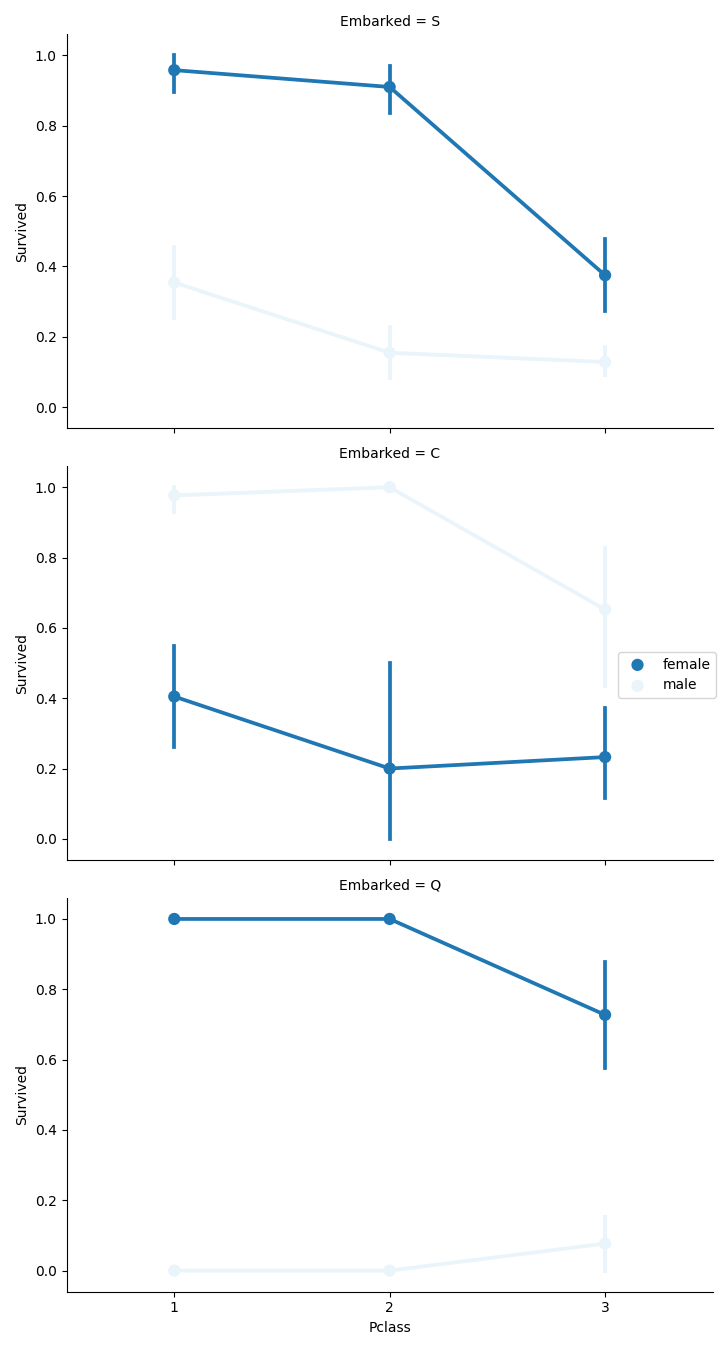

In [49]:
FacetGrid = sns.FacetGrid(tdf, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

## Survivial Count by Class (1 = 1st, 2 = 2nd, 3 = 3rd)
Pretty clear that higher class passengers had a better chance of living. 

<IPython.core.display.Javascript object>


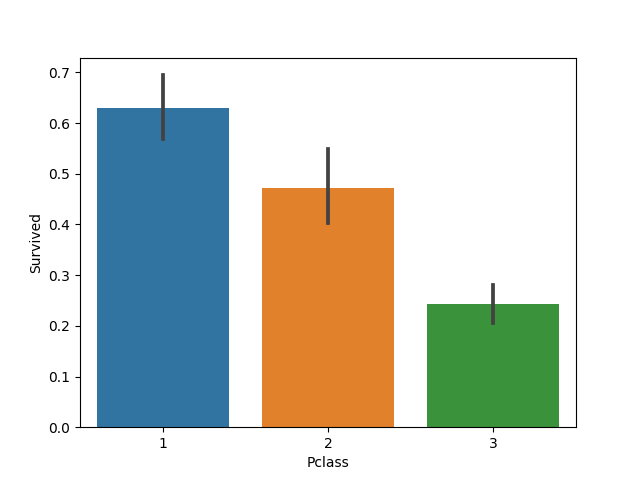

In [51]:
sns.barplot(x='Pclass', y='Survived', data=tdf)

## Survival by Age and Class (0=died, 1=survived)
The apparent distribution shift in survivors is interesting. The average age of surviving males drops as class drops. 

<IPython.core.display.Javascript object>


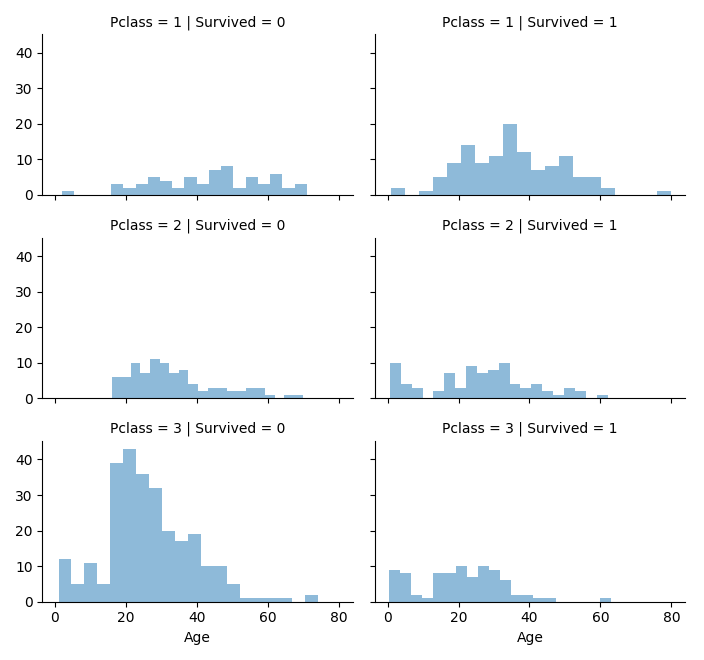

In [54]:
grid = sns.FacetGrid(tdf, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)